In [1]:
from minimal_model import mass_and_energy_constraints
import scipy.optimize as opt
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
# Glucose uptake and 

In [2]:
# Solve for non-0 steady state fluxes

# Set initial guess
#    vL, vG, vF, vK, vGL, vFK,  vLG, v0, vA, vR, vCO2 = v
v0 = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.1, 1.0, 1.0,]

# Solve for steady state fluxes
res = opt.fsolve(mass_and_energy_constraints, v0,)

# Print results
print('vL =', res[0])
print('vG =', res[1])
print('vF =', res[2])
print('vK =', res[3])
print('vGL =', res[4])
print('vFK =', res[5])
print('vLG =', res[6])
print('v0 =', res[7])
print('vA =', res[8])


vL = 0.013333333333333334
vG = 0.002437500000000003
vF = 0.005666666666666666
vK = 0.004
vGL = 0.01
vFK = 0.001
vLG = 0.003333333333333333
v0 = 0.007993055555555559
vA = 0.006666666666666666


In [3]:
# Check mass and energy balance
# Constaint names dLdt, dGdt, dFdt, dKdt, dGLY1, dR, dCO2, dE, dDF, dDL, dDK, dDG,  
names = ['dLdt', 'dGdt', 'dFdt', 'dKdt', 'dGLY1', 'dR', 'dCO2', 'dE', 'dDF', 'dDL', 'dDK',]
resisduals = mass_and_energy_constraints(res,)

# Print residuals
print('Residuals:')
for i in range(len(names)):
    print(names[i], ':', resisduals[i])
    

Residuals:
dLdt : 0.0
dGdt : 8.673617379884035e-19
dFdt : 1.734723475976807e-18
dKdt : 0.0
dGLY1 : 0.0
dR : 0.0
dCO2 : 0.0
dE : 0.0
dDF : -3.469446951953614e-18
dDL : 0.0
dDK : 0.0


In [4]:
# Mouse oxygen consumption from metabolic cage data

vO2_mL_per_min = 1.25 # mL/min

# 22.4 L/mol ideal gas
vO2_mmol_per_min = vO2_mL_per_min / 22.4 

# 25 g mouse
vO2_mmol_per_min_per_g = vO2_mmol_per_min / 25

vO2_nmol_per_min_per_g = vO2_mmol_per_min_per_g * 1e6


In [5]:
vO2_nmol_per_min_per_g

2232.1428571428573

In [6]:
5 * 4.1/25

0.82

In [7]:
# Scale the fluxes by vE -> ATP flux 

# ATP per O2 (3 per O)
PO2 = 5.0
# Whole body oxygen consumption rate ~ 2000 nmol/min/gBW
vO2 = 2000 * 0.7 
# ATP production rate
vATP = PO2 * vO2 
# Scale the oxygen fluxes by vE
vE = vATP 


In [16]:
# Print scaled results
print('Oxidation rates')
print('vL =', res[0] * vE * 3 )
print('vG =', res[1] * vE * 6)
print('vF =', res[2] * vE * 16)
print('vK =', res[3] * vE * 4)

print('Catabolic and glycolytic rates')
print('vGL =', res[4] * vE* 6 )
print('vFK =', res[5] * vE )
print('vLG =', res[6] * vE )

print('Anabolic rates')
print('v0 =', res[7] * vE )
print('vA =', res[8] * vE )
print('vR =', res[9] * vE )

print('CO2 production rate')
print('vCO2 =', res[10] * vE )


Oxidation rates
vL = 280.0
vG = 102.37500000000013
vF = 634.6666666666666
vK = 112.0
Catabolic and glycolytic rates
vGL = 420.0
vFK = 7.0
vLG = 23.333333333333332
Anabolic rates
v0 = 55.951388888888914
vA = 46.666666666666664
vR = 31.111111111111104
CO2 production rate
vCO2 = 1129.0416666666667


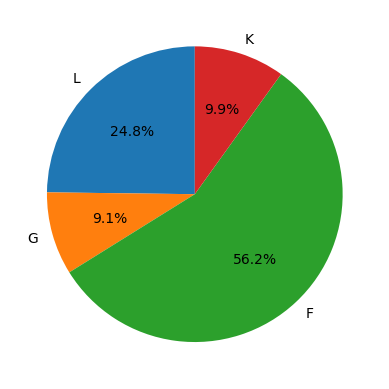

In [9]:
# Pie char of the oxidation rates
labels = ['L', 'G', 'F', 'K',]
sizes = [res[0] * vE * 3, res[1] * vE * 6, res[2] * vE * 16, res[3] * vE * 4,]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# 30 percent that we can not account for - assumed to be conses 
plt.show()

In [10]:
1/ ( (5 / 22.5)/4)

18.0

In [11]:

# Plot Fcirc 
vL, vG, vF, vK, vGL, vFK,  vLG, v0, vA, vR, vCO2 = res * vE

vCO2/vO2

0.8064583333333334

<BarContainer object of 1 artists>

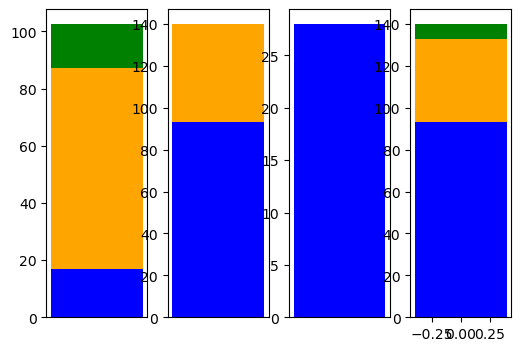

In [12]:

# Sum of consumption rates
FG  = [ vG , vGL , 0.5 *vR]
FL = [vL , 2*vLG]
FK = [vK]
FF = [3 * vR ,vF ,vFK]

f, ax = plt.subplots(1,4, figsize=(6,4))

# Stacked bar plot
ax[0].bar(0, FG[0], color='blue')
ax[0].bar(0, FG[1], bottom=FG[0], color='orange')
ax[0].bar(0, FG[2], bottom=FG[0]+FG[1], color='green')
ax[0].set_xticks([])

ax[1].bar(0, FL[0], color='blue')
ax[1].bar(0, FL[1], bottom=FL[0], color='orange')
ax[1].set_xticks([])

ax[2].bar(0, FK[0], color='blue')
ax[2].set_xticks([])

ax[3].bar(0, FF[0], color='blue')
ax[3].bar(0, FF[1], bottom=FF[0], color='orange')
ax[3].bar(0, FF[2], bottom=FF[0]+FF[1], color='green')

In [13]:
80/0.6

133.33333333333334

<BarContainer object of 1 artists>

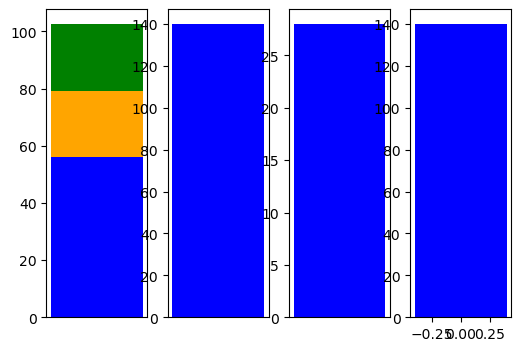

In [14]:


# Sum of production rates
FG  = [ v0, vLG, 0.5 *vA]
FL = [2*vGL]
FK = [vFK * 4]
FF = [3 * vA]

f, ax = plt.subplots(1,4, figsize=(6,4))

# Stacked bar plot
ax[0].bar(0, FG[0], color='blue')
ax[0].bar(0, FG[1], bottom=FG[0], color='orange')
ax[0].bar(0, FG[2], bottom=FG[0]+FG[1], color='green')
ax[0].set_xticks([])

ax[1].bar(0, FL[0], color='blue')
ax[1].set_xticks([])

ax[2].bar(0, FK[0], color='blue')
ax[2].set_xticks([])

ax[3].bar(0, FF[0], color='blue')

In [15]:
# reference timescale 